In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# To perform statistical analysis
import scipy.stats as stats

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [2]:
df = pd.read_csv("hr_data.csv")

In [3]:
df.shape

(14999, 10)

- There are 14999 employeed details in our dataset called 'hr_data' in which all the employees are compared with 10 attributes.

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


- first 5 entries of the dataset.

In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1
14998,0.37,0.52,2,158,3,0,0,support,low,1


- last 5 entries of the data set.

In [6]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
13424,0.93,0.95,5,176,6,0,1,accounting,medium,0
12331,0.11,0.85,7,302,4,0,0,sales,low,1
11465,0.55,0.64,3,178,2,0,1,sales,low,0
4220,0.87,0.78,3,170,2,0,0,sales,low,0
12076,0.10,0.83,6,295,4,0,0,product_mng,medium,1
952,0.09,0.94,6,308,4,0,0,technical,low,1
12600,0.77,0.98,5,259,6,0,0,product_mng,low,1
10030,0.66,0.74,4,179,3,0,0,accounting,low,0
14358,0.11,0.87,6,306,4,0,0,IT,low,1
6026,0.49,0.46,2,129,2,0,0,RandD,high,0


- Sample of 10 random entries from dataset.

In [7]:
del df["last_evaluation"]
df.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,2,157,3,0,0,sales,low,1
1,0.80,5,262,6,0,0,sales,medium,1
2,0.11,7,272,4,0,0,sales,medium,1
3,0.72,5,223,5,0,0,sales,low,1
4,0.37,2,159,3,0,0,sales,low,1


- deleted last_evaluation column as it connot give any important assessment towards our file output.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   Department             14999 non-null  object 
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.0+ MB


In [9]:
df.rename(
    columns={
        "average_montly_hours":"average_monthly_hours"
    },
    inplace=True,
)
df.head()

,satisfaction_level,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,2,157,3,0,0,sales,low,1
1,0.80,5,262,6,0,0,sales,medium,1
2,0.11,7,272,4,0,0,sales,medium,1
3,0.72,5,223,5,0,0,sales,low,1
4,0.37,2,159,3,0,0,sales,low,1


#### Observations:
- ALl headings are corrected.
- There are no missing data in any columns.
- Both Department and Salary has to be converted into category.
- left column should also be converted as binary as it has only 2 valurs, 0 for employee not leaving the company, 1 employee left the company.

In [10]:
df.describe(include = 'all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.61,0.25,0.09,0.44,0.64,0.82,1.0
number_project,14999.0,NaN,NaN,NaN,3.8,1.23,2.0,3.0,4.0,5.0,7.0
average_monthly_hours,14999.0,NaN,NaN,NaN,201.05,49.94,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.5,1.46,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14,0.35,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.02,0.14,0.0,0.0,0.0,0.0,1.0
Department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left,14999.0,NaN,NaN,NaN,0.24,0.43,0.0,0.0,0.0,0.0,1.0


#### observations:
- The maximum saatisfaction level obtained by the employee is given as 1 and the minimum is 0.09.
- The maximum no. of projects done by an employee within the company is 7 and min is 2.
- The employee with highest average hours worked monthly will be 310 while the least hours spent is 96.
- On the average, employees spend 3.5 years with the company.
- This dataset contain most info on the employees from the sales department.
- most of the employees in the dataset has a salary category of low.

In [11]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

- The data consists more information on the people who haven't left and not those who left the company.

## unique values of each attribute

In [12]:
df["satisfaction_level"].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [13]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [14]:
df["average_monthly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [15]:
df["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [16]:
df["Work_accident"].unique()

array([0, 1], dtype=int64)

In [17]:
df["promotion_last_5years"].unique()

array([0, 1], dtype=int64)

In [18]:
df["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [19]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
df["left"].unique()

array([1, 0], dtype=int64)

## EDA

### Univariant Analysis.

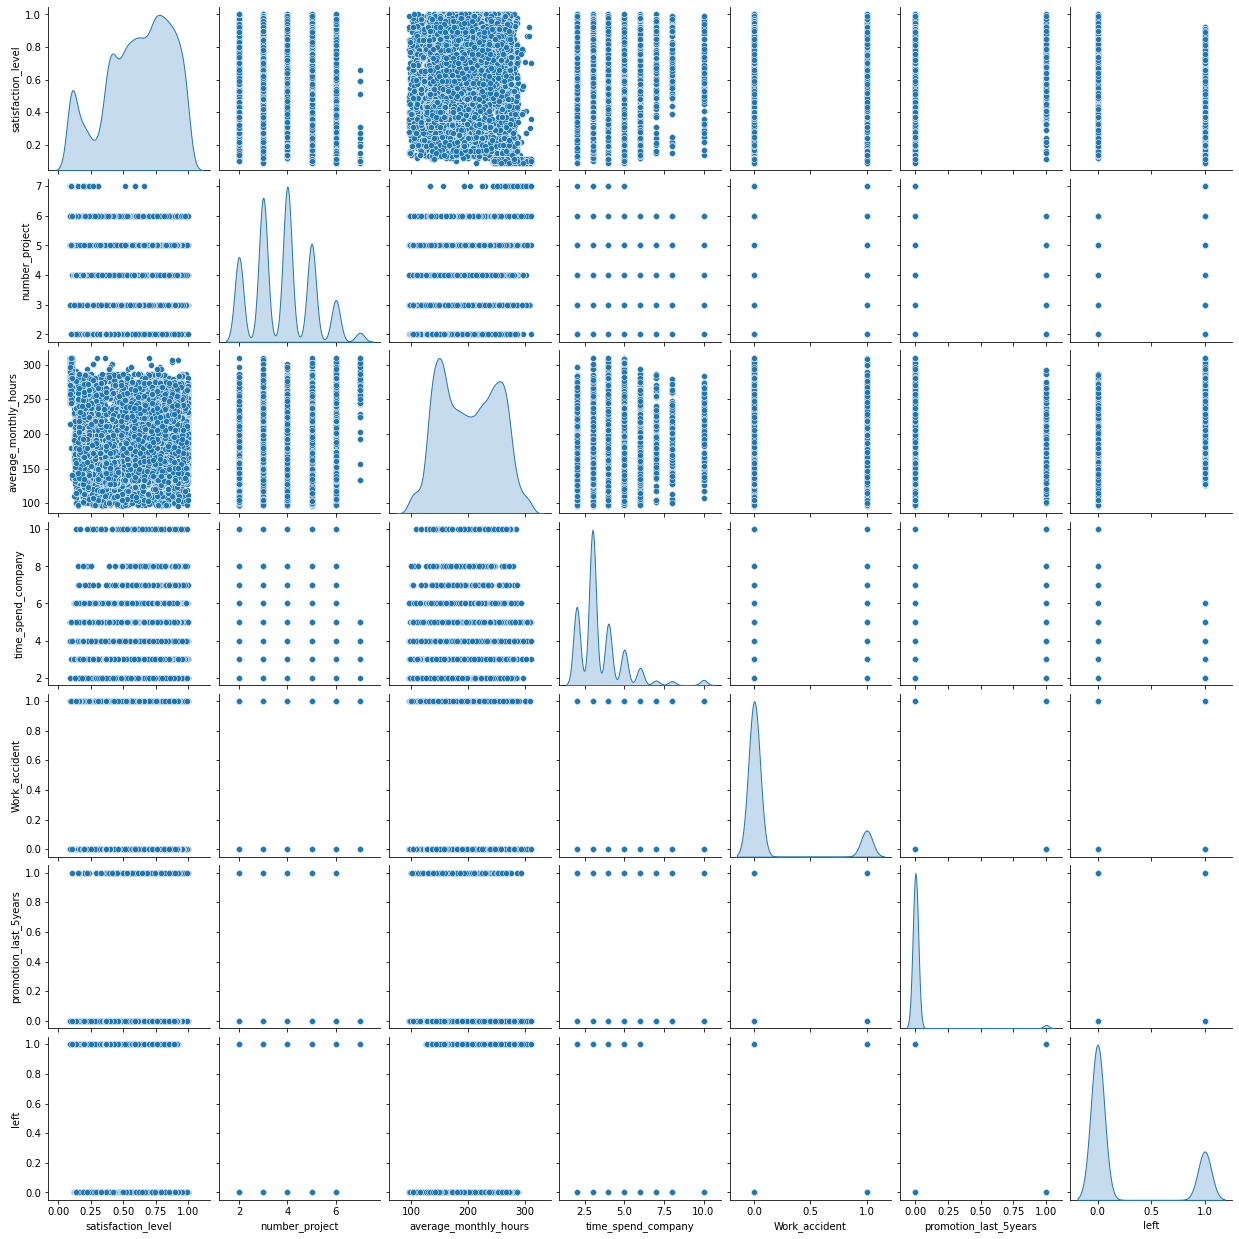

In [21]:
sns.pairplot(df, diag_kind="kde")
plt.show()

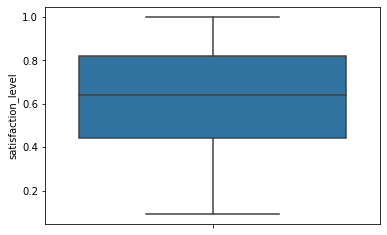

In [22]:
sns.boxplot(y='satisfaction_level',data=df)
plt.show()

- The average satisfaction level of the employees is at 0.65.
- most of the people's satisfaction level lies between 0.4-0.8

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

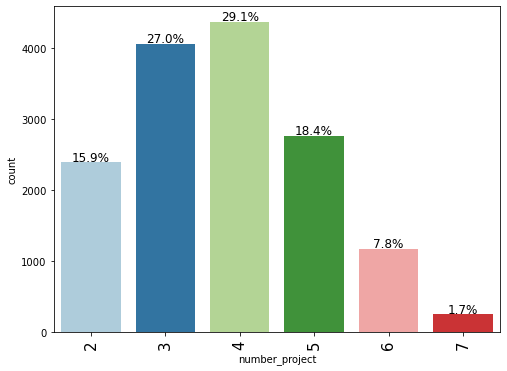

In [24]:
labeled_barplot(df, "number_project", perc=True)

#### observations:
- There are very less number employees who have worked on 7 projects in this comapany.
- most of the employees have worked on 4 projects, followed by people who worked on 3 and then those who worked on 5 projects.

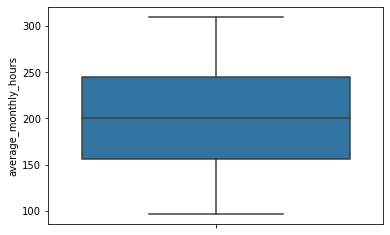

In [25]:
sns.boxplot(y='average_monthly_hours',data=df)
plt.show()

#### Observations:
- The average employees spent in the company per month in an hourly basis lies between 150-250.


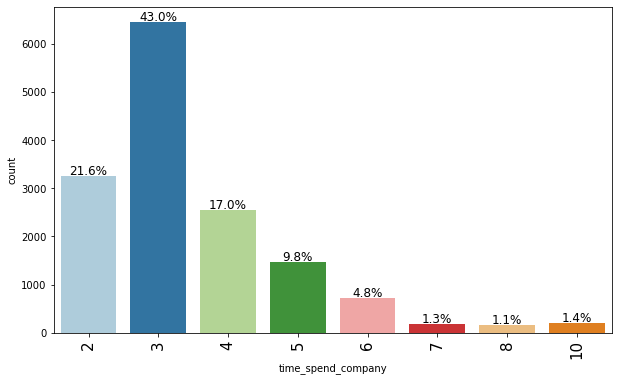

In [26]:
labeled_barplot(df, "time_spend_company", perc=True)

#### Observations:
- Nearly 43% people spent the company for 3 years.
- 3.8% of people are staying for a long time in the company which has to improve.
- 21.6% of people after staying for 2 years withthe company. 
- The company has to improve satisfaction of their employees and make them stay for long time which is improving the loyalty among the employees.

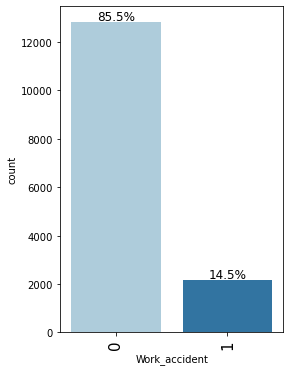

In [27]:
labeled_barplot(df, "Work_accident", perc=True)

#### Observations:
- The company is doing good job in maintaing less number of work accidents.


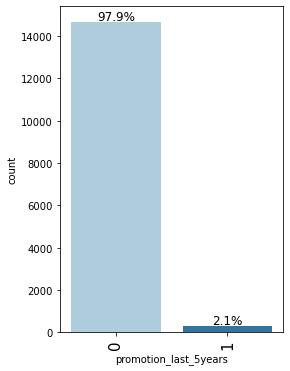

In [28]:
labeled_barplot(df, "promotion_last_5years", perc=True)

#### Observations:
- As we can see company has given out only 2.1% of their employees promotions.
- It is very important for every employee to feel appriciated and recognised within the company. By giving more promotions the company can show that they care about their employees hardwork which might improve in building trust between the company and employees and make them stay long with the company.

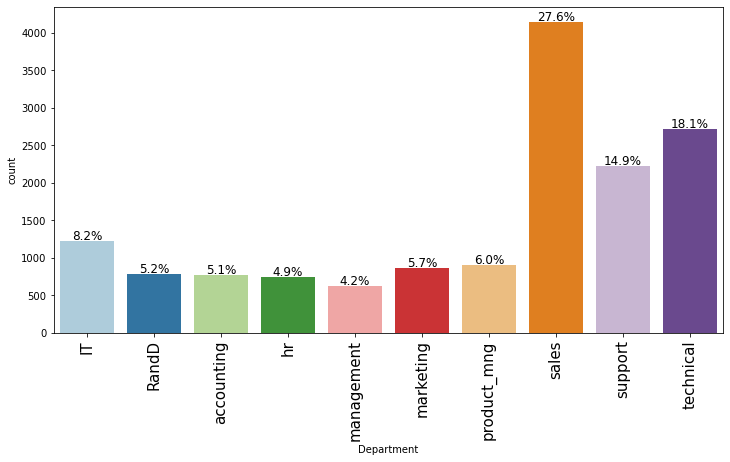

In [29]:
labeled_barplot(df, "Department", perc=True)

#### Observations:
- Most of the data is from sales department.
- Next is the technical department followed by support.
- The least are from Management and Hr.
- This might also mean that employees in these top departments are feeling recognised or wanting to move for a better job.

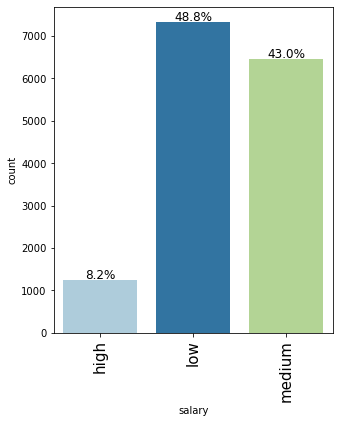

In [30]:
labeled_barplot(df, "salary", perc=True)

#### Observations:
- Most people from the data are from low salary range.
- Least people are from high salary ranges which is similar to above barplot depecting the departments. The highest departments are the ones which has the least salaries in a company.

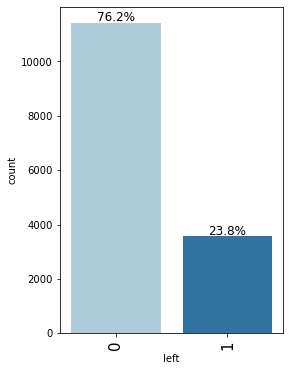

In [31]:
labeled_barplot(df, "left", perc=True)

- According to the above barplot, most of the people have not left the company yet.
- only 23.8% of employee who left the company are in this dataset.

### Bivariant Analysis

[Text(0.5, 1.0, 'left vs Satisfaction level')]

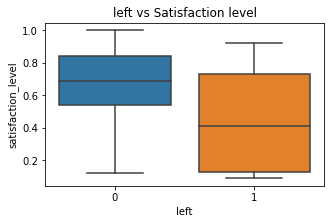

In [32]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="left", y="satisfaction_level", data=df).set(title="left vs Satisfaction level")

#### Observations:
- We can understand that the poeple with less satisfaction level are more tend to leave the company.

[Text(0.5, 1.0, 'Left Vs average monthly hours')]

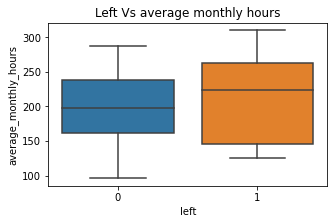

In [33]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="left", y="average_monthly_hours", data=df).set(title="Left Vs average monthly hours")

#### Observations:
- We can say that people with more average hours working in the company have more people who left the company.

In [34]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

left                0     1    All
number_project                    
All             11428  3571  14999
2                 821  1567   2388
6                 519   655   1174
5                2149   612   2761
4                3956   409   4365
7                   0   256    256
3                3983    72   4055
------------------------------------------------------------------------------------------------------------------------


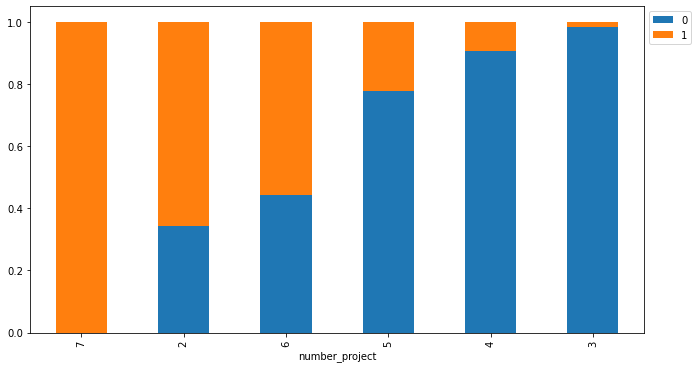

In [35]:
stacked_barplot(df, "number_project", "left")

#### observations:
- more people tend to leave the company who have worked in 7 projects, which means people are facing more pressure due to multiple projects which is making them to leave the company.
- We can see that even people working on just 2 projects are also leaving the company, which means they might be feeling less appreciated and worthy.
- But we can see less people are tend to leave the company when worked in 3 projects. People are feeling less pressured at the same time they are feeling it has enough projects to show their potential.

left                    0     1    All
time_spend_company                    
All                 11428  3571  14999
3                    4857  1586   6443
4                    1667   890   2557
5                     640   833   1473
6                     509   209    718
2                    3191    53   3244
7                     188     0    188
8                     162     0    162
10                    214     0    214
------------------------------------------------------------------------------------------------------------------------


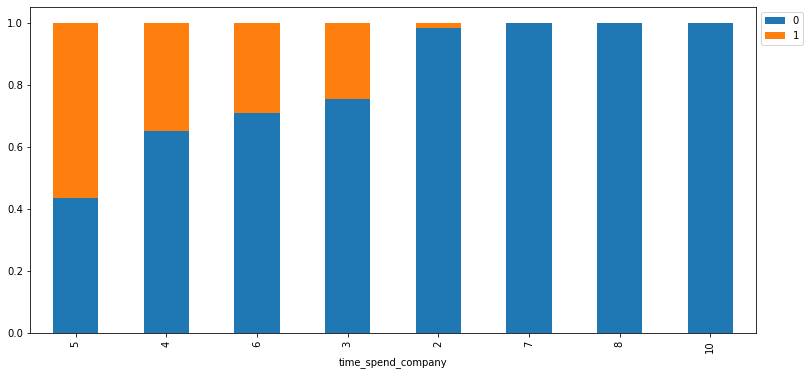

In [36]:
stacked_barplot(df, "time_spend_company", "left")

#### Observations:
- More people tend to leave the company after completion of their 5 years.
- people who stay more than 7 years tend to stay in the company as they have built loyalty towards the company.

left               0     1    All
Work_accident                    
All            11428  3571  14999
0               9428  3402  12830
1               2000   169   2169
------------------------------------------------------------------------------------------------------------------------


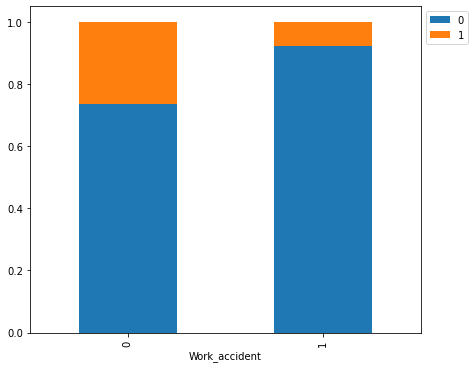

In [37]:
stacked_barplot(df, "Work_accident", "left")

#### observations:
- People with no work accidents are trying to leave the company rather than people who faced work accidents.

left                       0     1    All
promotion_last_5years                    
All                    11428  3571  14999
0                      11128  3552  14680
1                        300    19    319
------------------------------------------------------------------------------------------------------------------------


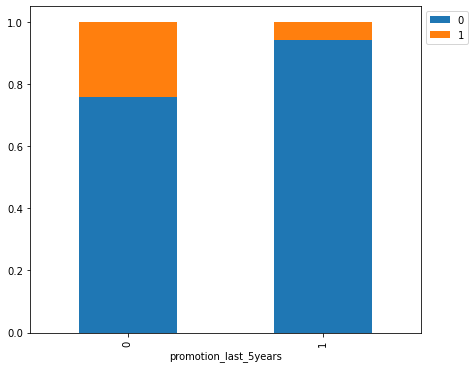

In [38]:
stacked_barplot(df, "promotion_last_5years", "left")

#### Observations:
- People who got appriciated through a promotion is tend to leave a company rather than who are not appreciated.

left             0     1    All
Department                     
All          11428  3571  14999
sales         3126  1014   4140
technical     2023   697   2720
support       1674   555   2229
IT             954   273   1227
hr             524   215    739
accounting     563   204    767
marketing      655   203    858
product_mng    704   198    902
RandD          666   121    787
management     539    91    630
------------------------------------------------------------------------------------------------------------------------


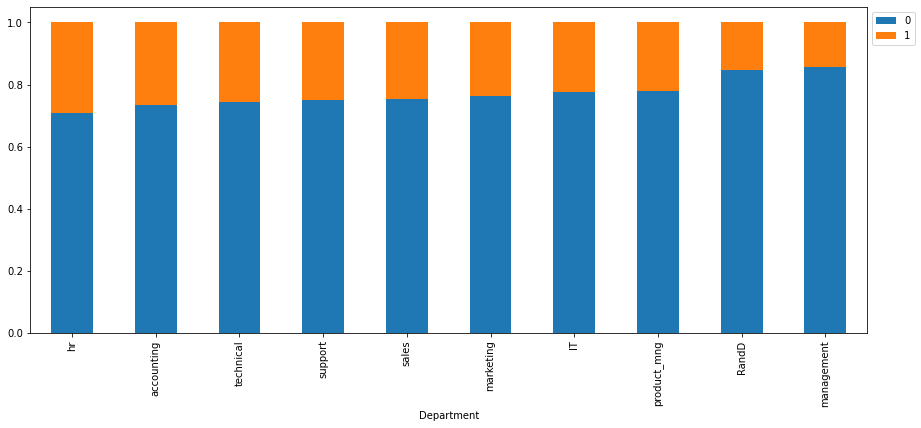

In [39]:
stacked_barplot(df, "Department", "left")

#### Observations:
- Employees in hr department are tend to leave the company.
- Employees in the management depratment tend to stay with the company as they might like the job culture in the company.

left        0     1    All
salary                    
All     11428  3571  14999
low      5144  2172   7316
medium   5129  1317   6446
high     1155    82   1237
------------------------------------------------------------------------------------------------------------------------


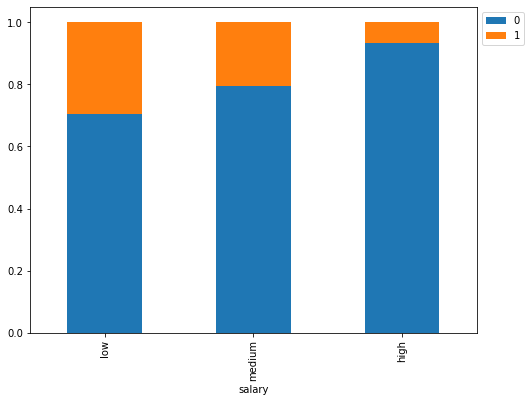

In [40]:
stacked_barplot(df, "salary", "left")

#### Observations:
- people with high salary does not leave the company as they might get more than this in the market. And they might be feeling satisfied.
- people with low salary want to move out of the company to improve their career options.


In [41]:
crosstab = pd.crosstab(
    df["left"], df["average_monthly_hours"]
)  

Ho = "average monthly hours has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "average monthly hours no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

average monthly hours no effect on people leaving the company as the p_value (0.0) < 0.05


In [42]:
crosstab = pd.crosstab(
    df["left"], df["satisfaction_level"]
)  

Ho = "satisfaction_level has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "satisfaction_level no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

satisfaction_level no effect on people leaving the company as the p_value (0.0) < 0.05


In [43]:
crosstab = pd.crosstab(
    df["left"], df["promotion_last_5years"]
)  

Ho = "promotion_last_5years has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "promotion_last_5years no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

promotion_last_5years no effect on people leaving the company as the p_value (0.0) < 0.05


In [44]:
crosstab = pd.crosstab(
    df["left"], df["Department"]
)  

Ho = "Department has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "Department no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Department no effect on people leaving the company as the p_value (0.0) < 0.05


In [45]:
crosstab = pd.crosstab(
    df["left"], df["number_project"]
)  

Ho = "number_project has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "number_project no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

number_project no effect on people leaving the company as the p_value (0.0) < 0.05


In [46]:
crosstab = pd.crosstab(
    df["left"], df["time_spend_company"]
)  

Ho = "time_spend_company has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "time_spend_company no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

time_spend_company no effect on people leaving the company as the p_value (0.0) < 0.05


In [47]:
crosstab = pd.crosstab(
    df["left"], df["Work_accident"]
)  

Ho = "Work_accident has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "Work_accident no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Work_accident no effect on people leaving the company as the p_value (0.0) < 0.05


In [48]:
crosstab = pd.crosstab(
    df["left"], df["salary"]
)  

Ho = "salary has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "salary no effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

salary no effect on people leaving the company as the p_value (0.0) < 0.05


- As per the above statistics analysis, it shows that nothing is effecting the poeple leaving the company. But to have a confirmed info we need to do further analysis.

### Multivariante analaysis

### Corelation

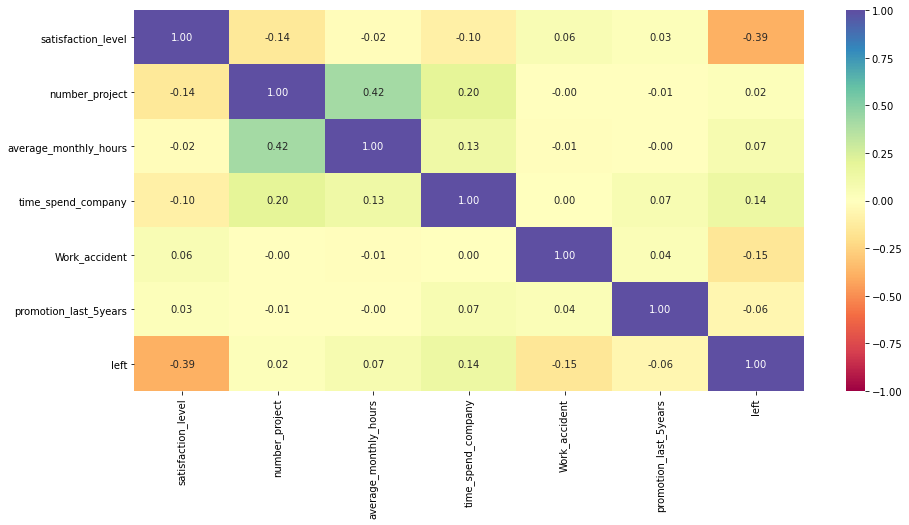

In [49]:
# Studying correlation among numeric variables
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
- employees leaving the company has a negative corelation with the satisfaction_level of the employee i.e., as the satisfaction level increases, employees want to stay with the company increases.
- Remaining all attributes do corelate with the peopole leaving the company but the corelation is not too high.

## Checking for missing variables

In [50]:
df.isnull().sum()

satisfaction_level       0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

- There are no missing variables in the dataset.